In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

## Data

In [2]:
df = sns.load_dataset("healthexp")
df.to_csv("test.csv")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

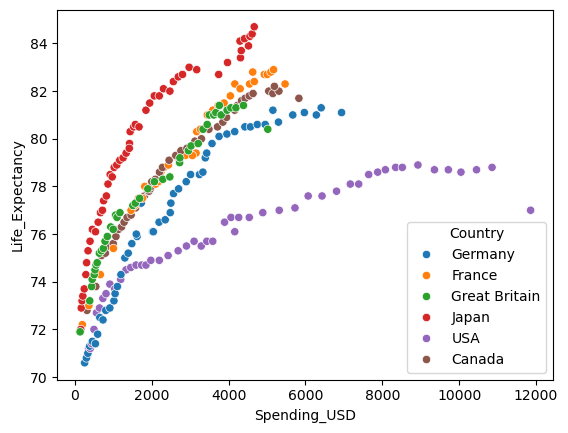

In [3]:
sns.scatterplot(df, x = 'Spending_USD', y='Life_Expectancy', hue='Country')

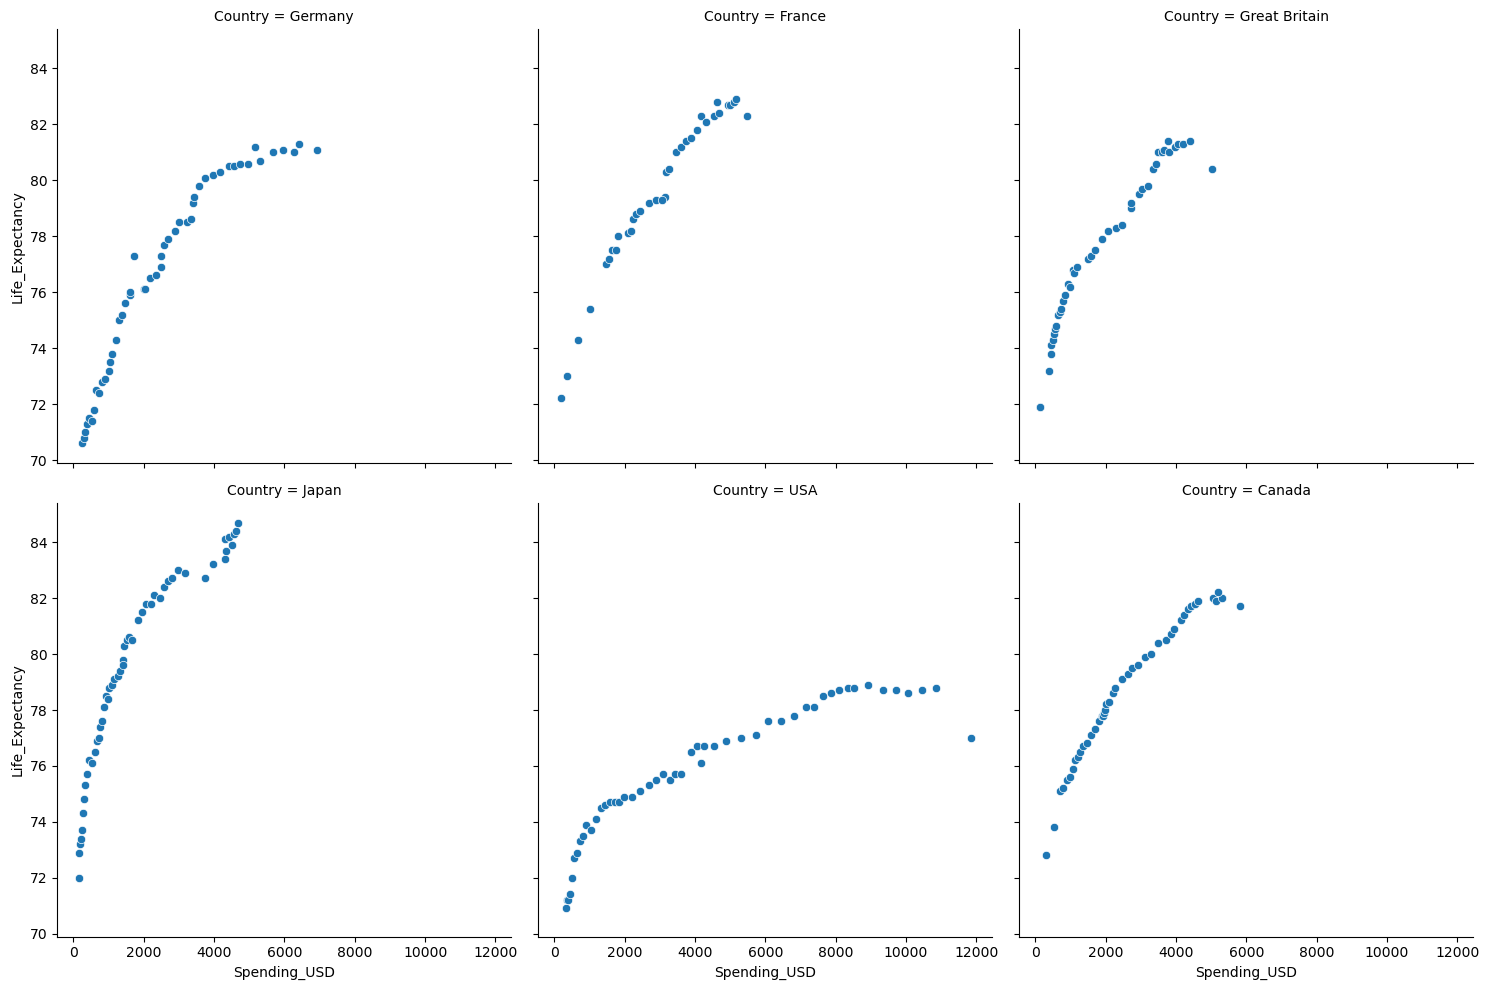

In [4]:
sns.relplot( df, x = 'Spending_USD', y='Life_Expectancy', col='Country', col_wrap=3)

1. Spending_USD et Life_Expectancy semblent être corrélées
- La corrélation de Pearson entre ces deux variables aux Etats_Unis , de 2000 à 2020
  - HO "Il n'existe pas une corrélation entre Spending_USD et Life_Expectancy"

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

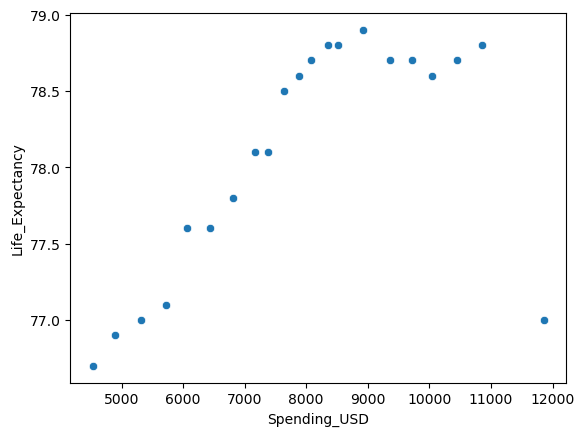

In [5]:
# données au USA de 2000-2020 pour Spending-USD et Lif_Expectancy
df_2000_2020 = df.query("`Country` == 'USA' & Year >=2000 " )
sns.scatterplot(df_2000_2020, x='Spending_USD', y='Life_Expectancy')

In [6]:
seuil = 0.02
correlation,p_value = sts.pearsonr(df_2000_2020['Life_Expectancy'], df_2000_2020['Spending_USD'])

print("Hypothése nulle: HO << Il n'existe pas une corrélation entre Spending_USD et Lif_Expectancy >>")
print(f"Valeur p obtenue : {p_value:.5f}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rjeter 'HO'")  
      
print(f"Coefficient de corrélation de Pearson : {correlation:.3f}")


Hypothése nulle: HO << Il n'existe pas une corrélation entre Spending_USD et Lif_Expectancy >>
Valeur p obtenue : 0.00266
Nous avons suffisamment d'argument pour rejeter 'HO'
Coefficient de corrélation de Pearson : 0.621


- Probablité d'obtenir une corrélation au moins aussi importante que celle-ci , si en réalité les deux variables n'étais pas corrélées

In [14]:
print(f"Valeur p obtenue : {p_value:.5f}")

Valeur p obtenue : 0.00266


2. Dans les vidéos précédentes, il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020.

- Peut-on tester cela avec l'une des techniques vues dans les vidéos précédentes ?
 - Non, car le test de student implique une independance entre les différentes observations, chose qui n'est pas le cas ici
 - De plus , il faut bien fait attention à la question qui nous interesse vraiment
   - Est-ce que la moyenne des durée de vien en Allemagne et GB de 1970-2020
   - Ou bien le fait de vouloir vérifier si à travers le temps , ces 2 pays avaient en moyenne la meme duree de vie. (Serie temoprelle)

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

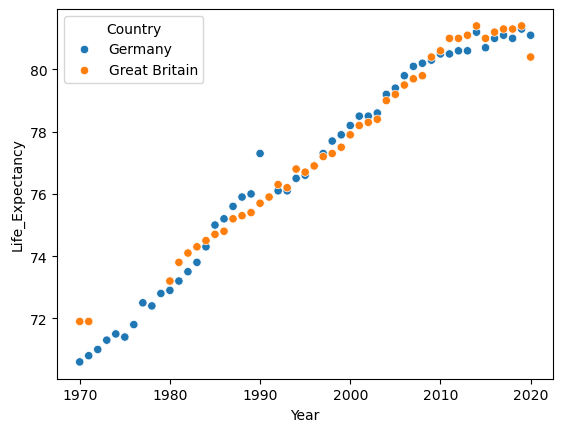

In [102]:
df_Britain_Germani = df.query("`Country` == 'Germany' | `Country` == 'Great Britain'")
sns.scatterplot(df_Britain_Germani, x = 'Year', y='Life_Expectancy', hue='Country')

In [89]:
print("HO: << L'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020. >>")

statistique, p_value = sts.ttest_ind(*df_Britain_Germani.groupby('Country')['Life_Expectancy'].apply(list))

print(f"Valeur p obtenue : {p_value:.5f}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rejeter 'HO'")  
      
print(statistique)
    

HO: << L'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020. >>
Valeur p obtenue : 0.18098
Nous n'avons pas suffisamment d'évidence pour rejeter 'HO'
-1.3480870354513648


3. Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an. Testez cette affirmation et donnez votre conclusion avec un niveau de confiance de 98 % (alpha = 0,02). (Vous pouvez utiliser la fonction `.diff()` de pandas pour calculer la différence d'une ligne à l'autre dans votre DataFrame).

Text(0.5, 1.0, 'Evolution  de la durée de vie moyenne au USA 1970-2020')

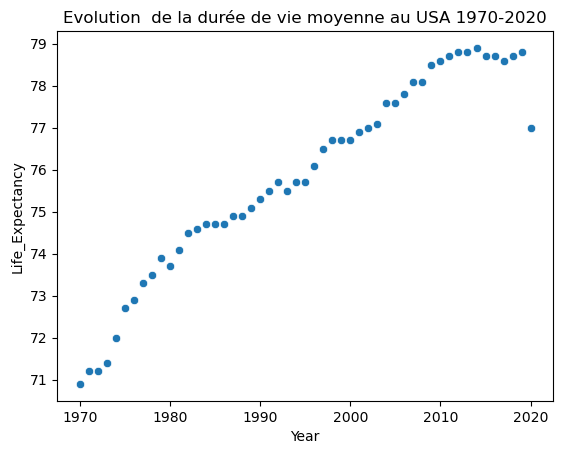

In [90]:
# données au USA de 2000-2020 pour Spending-USD et Lif_Expectancy
df_USA = df.query("`Country` == 'USA' " )
sns.scatterplot(df_USA, x='Year', y='Life_Expectancy')
plt.title('Evolution  de la durée de vie moyenne au USA 1970-2020')

In [108]:
df.query("`Country` == 'USA' ")['Life_Expectancy'].diff()

4      NaN
9      0.3
12     0.0
15     0.2
18     0.6
22     0.7
26     0.2
29     0.4
32     0.2
36     0.4
42    -0.2
47     0.4
52     0.4
57     0.1
62     0.1
68     0.0
73     0.0
78     0.2
83     0.0
88     0.2
94     0.2
99     0.2
105    0.2
111   -0.2
117    0.2
123    0.0
129    0.4
135    0.4
141    0.2
147    0.0
153    0.0
159    0.2
165    0.1
171    0.1
177    0.5
183    0.0
189    0.2
195    0.3
201    0.0
207    0.4
213    0.1
219    0.1
225    0.1
231    0.0
237    0.1
243   -0.2
249    0.0
255   -0.1
261    0.1
267    0.1
273   -1.8
Name: Life_Expectancy, dtype: float64

In [111]:
df1 = df.query("`Country` == 'USA' ")['Life_Expectancy'].diff()
p_value = sts.ttest_1samp(df1.dropna(), popmean=0.3).pvalue

print( "HO: << La durée  de vie au USA augmente en moyenne de 0.3 de 1970-2020 >> \n")
print(f"Valeur p obtenue : {p_value:.5f}")

if p_value < seuil:
    print("Nous avons suffisamment d'argument pour rejeter 'HO'")
else:
    print("Nous n'avons pas suffisamment d'évidence pour rejeter 'HO'") 
    

HO: << La durée  de vie au USA augmente en moyenne de 0.3 de 1970-2020 >> 

Valeur p obtenue : 0.00051
Nous avons suffisamment d'argument pour rejeter 'HO'
